<a href="https://colab.research.google.com/github/mariobgsp/thermal-face-recognition/blob/main/cifar10_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Load Data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [ ]:
# Look at the Data Types of Variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Get the shape of the arrays
print('x_train shape:', x_train.shape) # 4 Dimensional Array, 
                                       # 50000 rows of data, 32x32 pixel img size, RGB
print('y_train shape:', y_train.shape) # 50000 rows of data, 1 column, 2Dimensional Array
print('x_test shape:', x_test.shape) # 10000 rows of data, 32x32 pixel img size, RGB
print('y_test shape:', y_test.shape) # 10000 rows of data, 1 column, 2Dimensional Array

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
# Take A look at a first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

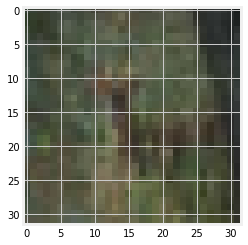

In [ ]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
# Get the image label
print('The image label is:', y_train[index])

The image label is: [4]


In [ ]:
# Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [ ]:
# Convert the labels into a set of 10 numbers to input into the neural networks
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
# Print the new label of the current image/picture above
print('the one hot label is:', y_train_one_hot[index])

the one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Normalize the pixels to be values between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
x_train[index];

In [ ]:
# Create the models architecture
model = Sequential()

# Adding the first layer
model.add( Conv2D(32, (5,5), activation="relu" , input_shape=(32,32,3)) )

# Add a Poolng Layer
model.add( MaxPooling2D(pool_size = (2,2)) )

# Add Another Convolution Layer
model.add( Conv2D(32, (5,5), activation="relu" ))

# Add anoteher Poolng Layer
model.add( MaxPooling2D(pool_size = (2,2)) )

# Add a flattening layer
model.add(Flatten())

# Add a layer with 1000 Neurons
model.add(Dense(1000, activation='relu'))

# Add Dropout Layer
model.add(Dropout(0.5))

# Add a layer with 500 Neurons
model.add(Dense(500, activation='relu'))

# Add Dropout Layer
model.add(Dropout(0.5))

# Add a layer with 250 Neurons
model.add(Dense(250, activation='relu'))

# Add a layer with 10 Neurons
model.add(Dense(10, activation='softmax'))

In [ ]:
# COmpile model
model.compile(loss = 'categorical_crossentropy',
              optimizer= 'adam',
              metrics = ['accuracy'])

In [ ]:
# Train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 20,
                 validation_split = 0.2)

Epoch 1/20
157/157 [==============================] - 2s 11ms/step - loss: 1.8214 - accuracy: 0.3213 - val_loss: 1.5498 - val_accuracy: 0.4422
Epoch 2/20
157/157 [==============================] - 1s 8ms/step - loss: 1.4558 - accuracy: 0.4703 - val_loss: 1.3286 - val_accuracy: 0.5214
Epoch 3/20
157/157 [==============================] - 1s 9ms/step - loss: 1.3194 - accuracy: 0.5227 - val_loss: 1.2358 - val_accuracy: 0.5566
Epoch 4/20
157/157 [==============================] - 1s 8ms/step - loss: 1.2127 - accuracy: 0.5644 - val_loss: 1.1522 - val_accuracy: 0.5943
Epoch 5/20
157/157 [==============================] - 1s 8ms/step - loss: 1.1285 - accuracy: 0.5981 - val_loss: 1.1105 - val_accuracy: 0.6150
Epoch 6/20
157/157 [==============================] - 1s 9ms/step - loss: 1.0565 - accuracy: 0.6267 - val_loss: 1.0409 - val_accuracy: 0.6328
Epoch 7/20
157/157 [==============================] - 1s 8ms/step - loss: 0.9925 - accuracy: 0.6488 - val_loss: 1.0407 - val_accuracy: 0.6343
Epoch

In [ ]:
# Evaluate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 1s 2ms/step - loss: 1.0337 - accuracy: 0.6740


0.6740000247955322

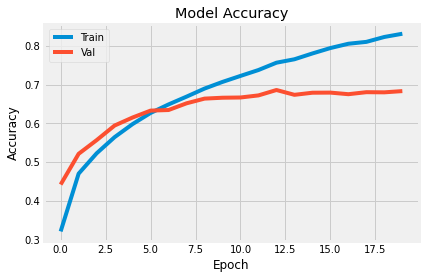

In [ ]:
# Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

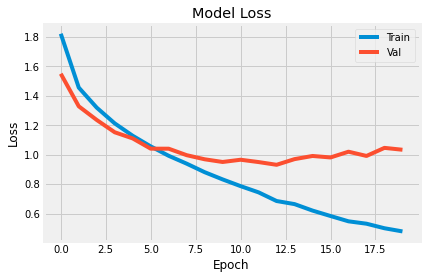

In [ ]:
# VIsualize the models Loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
# Test the model with an example
from google.colab import files
uploaded = files.upload()

Saving 121594.jpg to 121594 (2).jpg


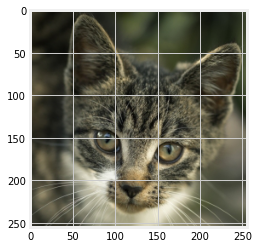

In [ ]:
# SHow the image
new_image = plt.imread('121594.jpg')
img = plt.imshow(new_image)

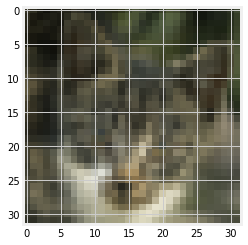

In [ ]:
# Reisize the image to 32x32 pixels
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))

# Show the predictions
predictions

array([[3.0606129e-06, 3.9917386e-06, 9.1886465e-03, 7.6962346e-01,
        8.3330376e-03, 7.0256516e-02, 1.4207059e-01, 4.8081420e-04,
        5.2722571e-06, 3.4579753e-05]], dtype=float32)

In [ ]:
# Sort the prediction from leat to greatest
list_index = [0,1,2,3,4,5,6,7,8,9]
x = predictions

for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

# Show the sorted labels in order
print(list_index)

[3, 6, 5, 2, 4, 7, 9, 8, 1, 0]


In [ ]:
# Print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':', round(predictions[0][list_index[i]] * 100,2), '%')

cat : 76.96 %
frog : 14.21 %
dog : 7.03 %
bird : 0.92 %
deer : 0.83 %


In [ ]:
# End of THe Codes